# Linear Regression
### Made by: Victor Nascimento Ribeiro 07/2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Ploting

In [2]:
def show_graph(x, y, w, line):
    # plot graph
    plt.figure(figsize=(10, 6))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.ylim(-30, 130)
    plt.xlim(0, 100)
    plt.xticks(np.arange(0, 101, 10))
    plt.yticks(np.arange(-50, 131, 10))
    plt.scatter(x, y)
    
    # plot line
    if line == True:
        x_line = np.arange(0, 100)
        y_line =  w[1] * x_line + w[0]
        plt.plot(x_line, y_line)
        plt.title("w = (%.1f , %.1f)" % (w[0], w[1]))
        
def show_error(cost):
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(iterations), cost)
    plt.title("MSE[%.1f, %.1f]  x  iterations" % (cost[0], cost[-1]))
    plt.xlabel("epochs")
    plt.ylabel("MSE")

## Creating a random training set

- Our training set consist in N radom points in $[0, 100] \times [-30, 130] \subseteq R^2$ region

- Let us fix a function $f(x) = ax\;$ where $a$ is a random number $\; a \in [0,1] \;$

- Let's force a linear relation between $x$ and $y$ around $y = ax \,$ by making $\, y_i = x_i + b_i$ ,$ \; b_i \in [-30,30]$

In [3]:
N = 50 # number of points

# force a linear relation between x and y
a = random.random()
x = np.random.uniform(0, 100, N)

b = np.random.uniform(-30, 30, N)
y = a*x + b

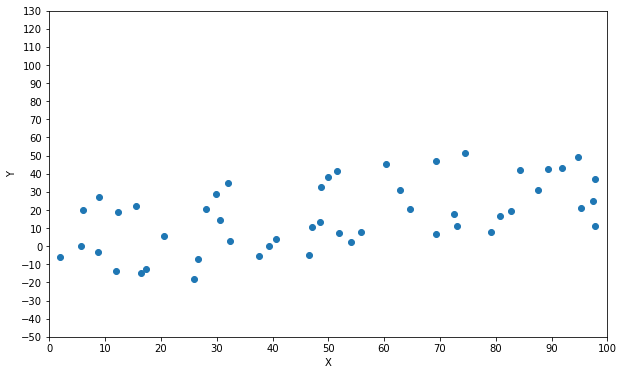

In [4]:
show_graph(x, y, 0, line=False)

## Analytical solution
### Solution based on matrix algebra
Cost function: $\large E_{in}(w) = \frac {1}{N} \sum_{i = 1}^{N} (h_w(x_i)-y_i)^{2}$

Resuduals: 

$\normalsize \begin{bmatrix} h_w(x_1)-y_1 \\ h_w(x_2)-y_2 \\ \vdots \\ h_w(x_N)-y_N \end{bmatrix} \; = \;
\begin{bmatrix} h_w(x_1) \\ h_w(x_2) \\ \vdots \\ h_w(x_N) \end{bmatrix} \; - \;
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} \; = \;
\begin{bmatrix} w^{T}x_1 \\ w^{T}x_2 \\ \vdots \\ w^{T}x_N \end{bmatrix} \; - \; y \; = \;
\begin{bmatrix} w_0 + w_1x_{11} + ... + w_dx_{1d} \\ w_0 + w_1x_{21} + ... + w_dx_{2d} \\ \vdots \\ w_0 + w_1x_{N1} + ... + w_dx_{Nd} \end{bmatrix} \; - \; y \; = \;
\underbrace{\begin{bmatrix} 1 & x_{11} & ... & x_{1d} \\ 1 & x_{21} & ... & x_{2d} \\ \vdots \\ 1 & x_{N1} & ... & x_{Nd} \end{bmatrix}}_{\large X} \;
\underbrace{\begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_d \end{bmatrix}}_{\large w} \; - \; y
$

<br /> 
<br /> 

Thus, the vector of residuals can be expressed as: $\normalsize \quad \begin{bmatrix} h_w(x_1)-y_1 \\ h_w(x_2)-y_2 \\ \vdots \\ h_w(x_N)-y_N \end{bmatrix} \; = \; \mathbf{Xw - y}$

<br /> 

We need the square of the residuals: $\normalsize \quad \begin{bmatrix} (h_w(x_1)-y_1)^{2} \\ (h_w(x_2)-y_2)^{2} \\ \vdots \\ (h_w(x_N)-y_N)^{2} \end{bmatrix} \; = \; \mathbf{(Xw - y)^{T}(Xw - y)}$

<br /> 

It can be expressed as: $ \normalsize \mathbf{\lVert Xw - y \rVert^{2}} $

<br /> 


### Minimizing

$\large E_{in}(w) = \frac {1}{N} \lVert Xw - y \rVert^{2}$

<br /> 
Thus:<br /> 
$\large \nabla E_{in}(w) = \frac {2}{N} X^{T}(Xw - y) = 0$ <br /> 
$\large X^{T}Xw = X^{T}y $ <br /> 
$\large \mathbf{w = X^{\dagger}y} \quad$ where $\normalsize X^{\dagger} = (X^{T}X)^{-1}X^{T}$ is the pseudo-inverse of X


In [5]:
# construct X and y vectors
X = np.concatenate(([np.ones(N)], [np.transpose(x)]))
X = np.transpose(X)
Y = np.reshape(y, (-1,1))

# compute the pseudo-inverse of X
X_t = np.linalg.pinv(X)

# calculates the final weight vector
w_analit = np.dot(X_t, Y)

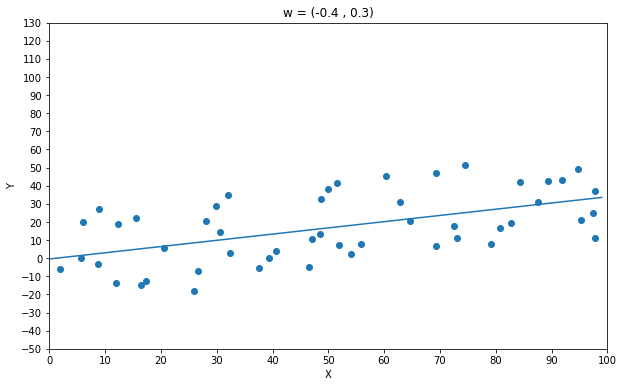

In [6]:
show_graph(x, y, w_analit, line=True)

## Iterative solution
### Gradient Descent Technique
Cost function: $\large E_{in}(w) = \frac {1}{N} \sum_{i = 1}^{N} (h_w(x_i)-y_i)^{2}$

$\large \nabla E_{in}(w) = \begin{bmatrix} \frac{\partial E_{in}}{\partial w_0} & \frac{\partial E_{in}}{\partial w_1} & ... & \frac{\partial E_{in}}{\partial w_d} \end{bmatrix} ^{T}$


$ \begin{split}
\normalsize \frac{\partial E_{in}}{\partial w_j} & = 
\frac{\partial}{\partial w_j} \frac{1}{N} \sum_{i = 1}^{N} (\hat{y} - y)^{2} \\ & = 
\frac{1}{N} \sum_{i = 1}^{N} 2(\hat{y} - y) \frac{\partial}{\partial w_j} (\hat{y} - y) \\ &  = 
\frac{2}{N} \sum_{i = 1}^{N} (\hat{y} - y) \frac{\partial}{\partial w_j} ((w_0 + w_1x_{i1} + ... + w_jx_{ij} + ... + w_dx_{id}) - y) \\ & = 
\frac{2}{N} \sum_{i = 1}^{N} (\hat{y} - y)x_{ij} 
\end{split} $

<br /> 

In [7]:
def MSE(X, y, w):
    return np.sum(X @ w.T - y)**2 / N

In [8]:
alpha = 0.0001 # learning rate
iterations = 2000 # epochs
w_stoch = w_batch = np.random.rand(2) # small random values

### 1: Stochastic GradientDescent
**w** &larr; small random value <br /> 
**repeat:** <br /> 
&emsp;&emsp; **for all $(x,y)$ do** <br /> 
&emsp;&emsp; compute $\hat{y} = w^{T}x$ <br /> 
&emsp;&emsp; $ w_j \leftarrow w_j - \frac {1}{N} \alpha (\hat{y} - y) x_j , \; j = 0, 1, 2, ... , d $ <br /> 
&emsp; **end for** <br /> 
**until** number of iterations = epochs


In [9]:
cost_stoch = np.zeros(iterations)

for it in range (iterations):
    for xi,yi in zip(X,y):
        y_hat = np.dot(w_stoch, xi)
        w_stoch = w_stoch - alpha * (y_hat - yi) * xi / N**2
        
    cost_stoch[it] = MSE(X, y, w_stoch)

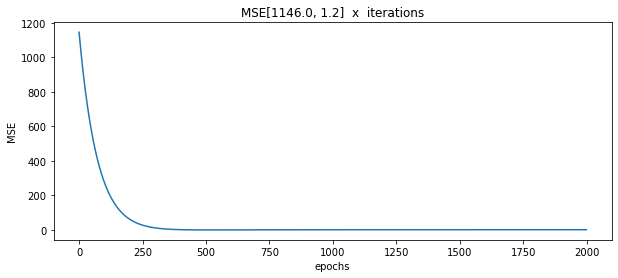

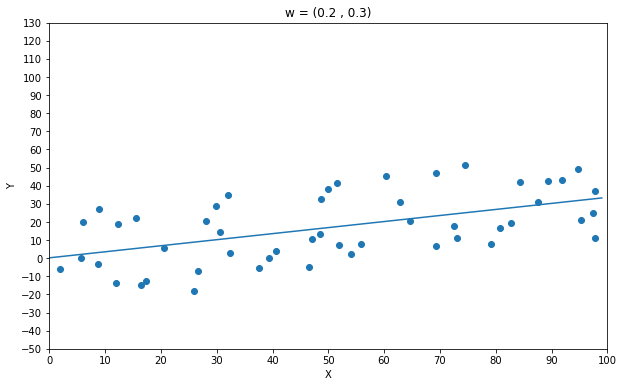

In [10]:
show_error(cost_stoch)
show_graph(x, y, w_stoch, line=True)

### 2: Batch Gradient

**w** &larr; small random value <br /> 
**repeat:** <br /> 
&emsp; $\Delta w_j \leftarrow 0, j = 0, 1, 2, ... ,d$ <br /> 
&emsp; **for all $(x,y)$ do** <br /> 
&emsp;&emsp; compute $\hat{y} = w^{T}x$ <br /> 
&emsp;&emsp; $ \Delta w_j \leftarrow \Delta w_j - \frac {1}{N} (\hat{y} - y) x_j , \; j = 0, 1, 2, ... , d $ <br /> 
&emsp; **end for** <br /> 
&emsp; $w_j \leftarrow w_j + \alpha \Delta w_j , \; j = 0, 1, 2, ..., d $ <br /> 
**until** number of iterations = epochs

In [11]:
cost_batch = np.zeros(iterations)

for it in range (iterations):
    delta_w = np.zeros(2)
    
    y_hat = np.dot(X, w_batch.T)

    delta_w = -np.dot((y_hat - y),X) / N

    w_batch = w_batch + alpha * delta_w / N
    cost_batch[it] = MSE(X, y, w_batch)

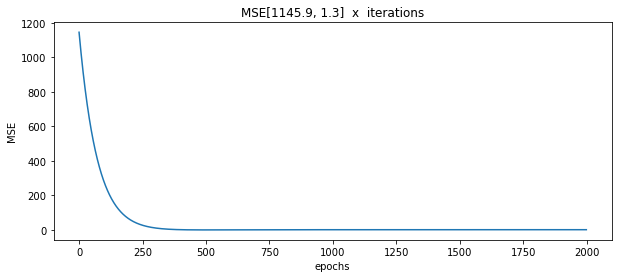

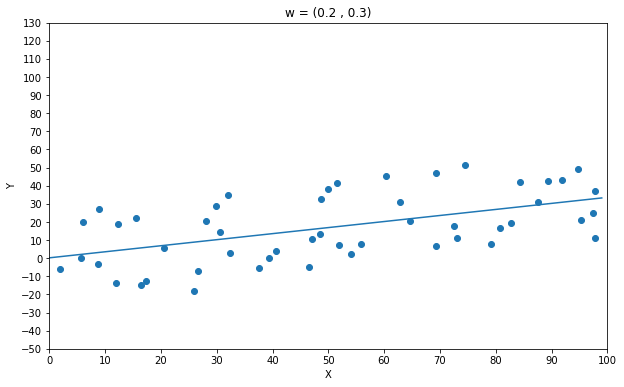

In [12]:
show_error(cost_batch)
show_graph(x, y, w_batch, line=True)

## All graphs

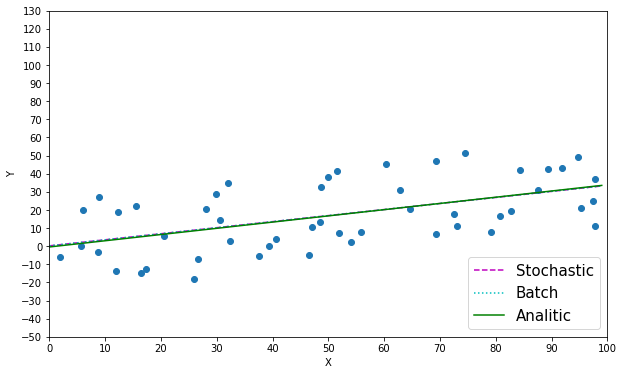

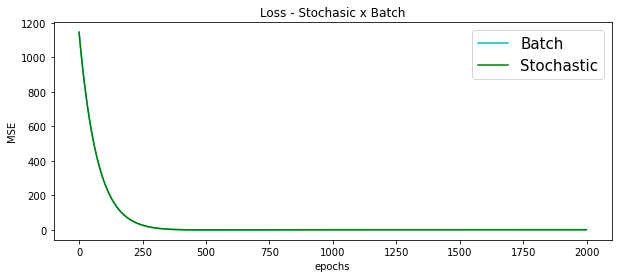

In [13]:
x_line = np.arange(0, 100)

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlim(0,100)
plt.ylim(-50,130)

plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(-50, 131, 10))
plt.xlabel("X")
plt.ylabel("Y")

y_line =  w_stoch[1] * x_line + w_stoch[0]
plt.plot(x_line, y_line, c='m', label="Stochastic",ls='--')

y_line =  w_batch[1] * x_line + w_batch[0]
plt.plot(x_line, y_line, c='c', label="Batch", ls =':')

y_line =  w_analit[1] * x_line + w_analit[0]
plt.plot(x_line, y_line, c='g', label="Analitic")

plt.legend(loc="lower right", fontsize=15) 
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(np.arange(iterations), cost_batch, label="Batch", c='c')
plt.plot(np.arange(iterations), cost_stoch, label="Stochastic", c='g')
plt.title("Loss - Stochasic x Batch")
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend(loc="upper right", fontsize=15) 
plt.show()

## References

 - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
 - https://work.caltech.edu/telecourse (lecture 3)
 - Abu-Mostafa, Yaser S., Magdon-Ismail, Malik and Lin, Hsuan-Tien. Learning From Data. : AMLBook, 2012.